1) Boolean Gates using Perceptron

In [ ]:
import numpy as np

def unitStep(v):
    return 1 if v >= 0 else 0

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

def AND_logicFunction(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptronModel(x, w, b)

def OR_logicFunction(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptronModel(x, w, b)

def NAND_logicFunction(x):
    w = np.array([-1, -1])
    b = 1.5
    return perceptronModel(x, w, b)

def NOR_logicFunction(x):
    w = np.array([-1, -1])
    b = 0.5
    return perceptronModel(x, w, b)

def NOT_logicFunction(x):
    w = np.array([-2])
    b = 1
    return perceptronModel(x, w, b)

def XOR_logicFunction(x):
    not_x1 = NOT_logicFunction([x[0]])
    not_x2 = NOT_logicFunction([x[1]])
    and1 = AND_logicFunction([not_x1, x[1]])
    and2 = AND_logicFunction([x[0], not_x2])
    return OR_logicFunction([and1, and2])

test_cases = [np.array([0, 1]), np.array([1, 1]), np.array([0, 0]), np.array([1, 0])]

print("AND Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {AND_logicFunction(x)}")

print("OR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {OR_logicFunction(x)}")

print("NAND Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {NAND_logicFunction(x)}")

print("NOR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {NOR_logicFunction(x)}")

print("NOT Gate:")
for x in [0, 1]:
    print(f"Input: {x}, Output: {NOT_logicFunction([x])}")

print("XOR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {XOR_logicFunction(x)}")


AND Gate:
Input: [0 1], Output: 0
Input: [1 1], Output: 1
Input: [0 0], Output: 0
Input: [1 0], Output: 0
OR Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 1
Input: [0 0], Output: 0
Input: [1 0], Output: 1
NAND Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 0
Input: [0 0], Output: 1
Input: [1 0], Output: 1
NOR Gate:
Input: [0 1], Output: 0
Input: [1 1], Output: 0
Input: [0 0], Output: 1
Input: [1 0], Output: 0
NOT Gate:
Input: 0, Output: 1
Input: 1, Output: 0
XOR Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 0
Input: [0 0], Output: 0
Input: [1 0], Output: 1


2) Stochastic and Batch GD


Epoch 1 (SGD):
 Updated weights: [-0.87202837  0.55539338], Updated bias: 1.7326262844715667

Epoch 2 (SGD):
 Updated weights: [-0.90883544  0.37135802], Updated bias: 1.6590121428682651

Epoch 3 (SGD):
 Updated weights: [-0.94353887  0.1978409 ], Updated bias: 1.5896052953291422

Epoch 4 (SGD):
 Updated weights: [-0.97522635  0.0394035 ], Updated bias: 1.5262303341223689

Epoch 5 (SGD):
 Updated weights: [-1.00308392 -0.09988439], Updated bias: 1.4705151779343262

Epoch 6 (SGD):
 Updated weights: [-1.02670615 -0.21799552], Updated bias: 1.4232707243066125

Epoch 7 (SGD):
 Updated weights: [-1.0462178  -0.31555378], Updated bias: 1.3842474202532002

Epoch 8 (SGD):
 Updated weights: [-1.06212059 -0.3950677 ], Updated bias: 1.3524418543057954

Epoch 9 (SGD):
 Updated weights: [-1.07504677 -0.4596986 ], Updated bias: 1.32658949352136

Epoch 10 (SGD):
 Updated weights: [-1.08559256 -0.51242758], Updated bias: 1.3054979037010446

Epoch 1 (Batch GD):
 Updated weights: [ 1.74260603 -0.896708

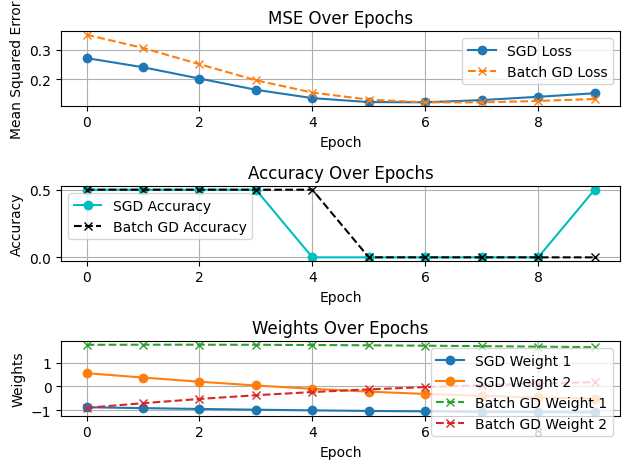


Final Results:
SGD: Final weights: [-1.08559256 -0.51242758], Final bias: 1.3054979037010446
Batch GD: Final weights: [1.64308974 0.18071023], Final bias: -0.48504118866949186


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, w, b):
    return np.dot(x, w) + b

def sigmoid(y_in):
    return 1 / (1 + np.exp(-y_in))

def update_weights(c, y, y_hat, x):
    return c * (y_hat - y) * x

def update_bias(c, y, y_hat):
    return c * (y_hat - y)

def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def compute_accuracy(y, y_hat, threshold=0.2):
    predictions = (abs(y - y_hat) < threshold).astype(int)
    return np.mean(predictions)

def sgd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (SGD):")
        for xi, yi in zip(x, y):
            y_hat = sigmoid(perceptron(xi, w, b))
            dw = update_weights(1, yi, y_hat, xi)
            db = update_bias(1, yi, y_hat)
            w -= alpha * dw
            b -= alpha * db
            print(f" Updated weights: {w}, Updated bias: {b}")

        y_hat_total = sigmoid(perceptron(x, w, b))
        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat_total))
        accuracies.append(compute_accuracy(y, y_hat_total))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

def batch_gd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (Batch GD):")
        y_hat = sigmoid(perceptron(x, w, b))
        dw = np.mean(update_weights(1, y, y_hat, x), axis=0)
        db = np.mean(update_bias(1, y, y_hat))
        w -= alpha * dw
        b -= alpha * db
        print(f" Updated weights: {w}, Updated bias: {b}")

        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat))
        accuracies.append(compute_accuracy(y, y_hat))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

x = np.array([[0.5, 2.5]])
y = np.array([0.2, 0.9])
epochs, alpha = 10, 0.1

weights_sgd, biases_sgd, losses_sgd, accuracies_sgd = sgd(x, y, epochs, alpha)
weights_batch, biases_batch, losses_batch, accuracies_batch = batch_gd(x, y, epochs, alpha)

plt.subplot(3, 1, 1)
plt.plot(losses_sgd, marker='o', label='SGD Loss')
plt.plot(losses_batch, marker='x', linestyle='--', label='Batch GD Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(3, 1, 2)
plt.plot(accuracies_sgd, marker='o', color='c', label='SGD Accuracy')
plt.plot(accuracies_batch, marker='x', linestyle='--', color='k', label='Batch GD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)

# Weight plot
plt.subplot(3, 1, 3)
for i in range(weights_sgd.shape[1]):
    plt.plot(weights_sgd[:, i], marker='o', label=f'SGD Weight {i+1}')
for i in range(weights_batch.shape[1]):
    plt.plot(weights_batch[:, i], marker='x', linestyle='--', label=f'Batch GD Weight {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.title('Weights Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Results:")
print(f"SGD: Final weights: {weights_sgd[-1]}, Final bias: {biases_sgd[-1]}")
print(f"Batch GD: Final weights: {weights_batch[-1]}, Final bias: {biases_batch[-1]}")


3) Backpropagation

Epoch 1/1000
MSE: 0.4627, Accuracy: 0.4762
Epoch 101/1000
MSE: 0.1192, Accuracy: 0.8190
Epoch 201/1000
MSE: 0.0816, Accuracy: 0.8857
Epoch 301/1000
MSE: 0.0578, Accuracy: 0.9238
Epoch 401/1000
MSE: 0.0411, Accuracy: 0.9429
Epoch 501/1000
MSE: 0.0312, Accuracy: 0.9619
Epoch 601/1000
MSE: 0.0257, Accuracy: 0.9619
Epoch 701/1000
MSE: 0.0224, Accuracy: 0.9524
Epoch 801/1000
MSE: 0.0203, Accuracy: 0.9524
Epoch 901/1000
MSE: 0.0188, Accuracy: 0.9524


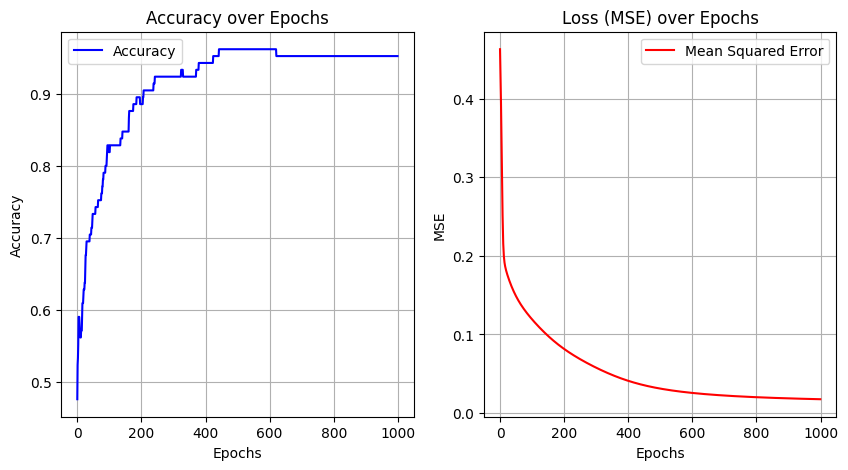

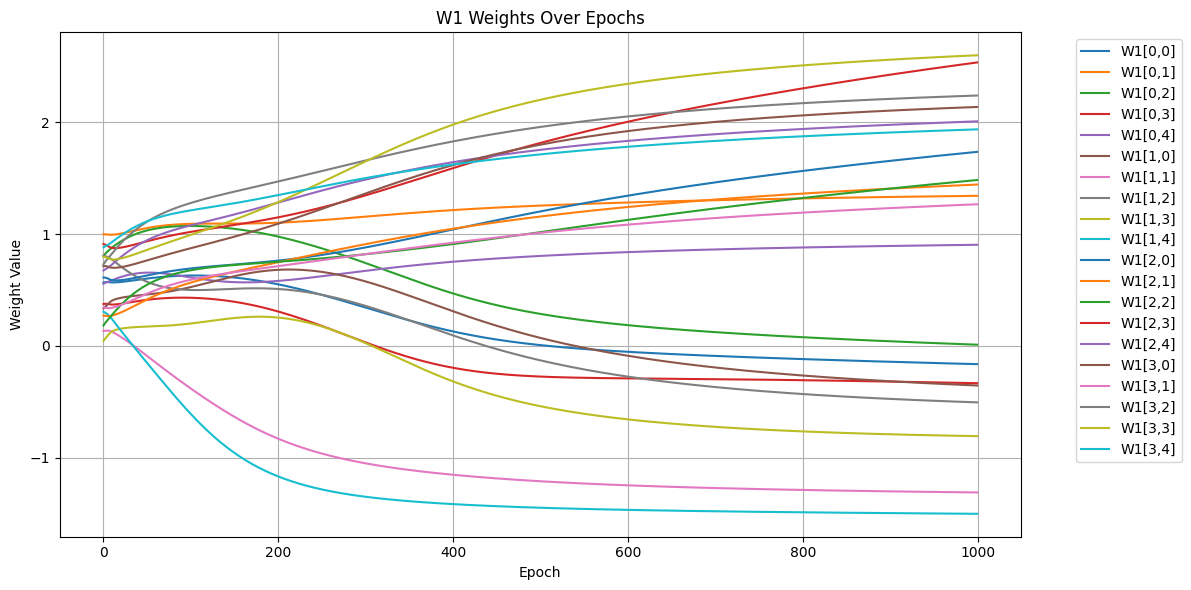

Test Accuracy: 0.9778


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.rand(input_size, hidden_size)
    W2 = np.random.rand(hidden_size, output_size)
    b1 = np.random.rand(1, hidden_size)
    b2 = np.random.rand(1, output_size)
    return W1, W2, b1, b2

def forward_propagation(X, W1, W2, b1, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, A2, W2):
    error = y - A2
    dZ2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dW1, dW2, db1, db2, error

W1, W2, b1, b2 = initialize_weights(input_size, hidden_size, output_size)

learning_rate = 0.01
epochs = 1000
mse_history = []
accuracy_history = []
W1_history = []
W2_history = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, W2, b1, b2)
    dW1, dW2, db1, db2, error = backward_propagation(X_train, y_train, Z1, A1, A2, W2)
    mse = np.mean(np.square(error))
    mse_history.append(mse)

    W1 += learning_rate * dW1
    W2 += learning_rate * dW2
    b1 += learning_rate * db1
    b2 += learning_rate * db2

    W1_history.append(W1.copy())
    W2_history.append(W2.copy())

    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy_history, label="Accuracy", color="blue")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), mse_history, label="Mean Squared Error", color="red")
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid()
plt.legend()

plt.figure(figsize=(12, 6))
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        plt.plot([W1_history[epoch][i, j] for epoch in range(epochs)], label=f'W1[{i},{j}]')
plt.title("W1 Weights Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, W2, b1, b2)

test_predictions = np.argmax(A2_test, axis=1)
test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)

print(f'Test Accuracy: {test_accuracy:.4f}')


4) Optimizers

In [1]:
import numpy as np

def perceptron(x, w, b):
  return np.dot(x, w) + b

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [2]:
def mini_batch_GD(X, Y, w, b, epoch=50, batch_size=100):
  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:
        w = w - eta * dw
        b = b - eta * db

In [3]:
def momentum_GD(X, Y, w, b, epoch=50, batch_size=100, momentum=0.9):
  Hw = 0
  Hb = 0
  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw = momentum * Hw + (1 - momentum) * dw
        Hb = momentum * Hb + (1 - momentum) * db


        w = w - eta * Hw
        b = b - eta * Hb

In [4]:
def NAGD(X, Y, w, b, epoch=50, batch_size=100, momentum=0.9):
  Hw, Hb, dw, db = 0, 0, 0, 0
  beta = 0.95

  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw = beta * Hw + (1 - beta) * dw
        Hb = beta * Hb + (1 - beta) * db


        w = w - eta * (Hw - beta * Hb)
        b = b - eta * (Hb - beta * Hw)

In [5]:
def AdaGrad(X, Y, w, b, epoch=50, batch_size=100, eta=0.01, epsilon=1e-8):
  Hw = 0
  Hb = 0

  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw += dw**2
        Hb += db**2


        w -= eta * dw / (np.sqrt(Hw) + epsilon)
        b -= eta * db / (np.sqrt(Hb) + epsilon)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu', kernel_initializer='random_normal'),
        Dense(10, activation='softmax', kernel_initializer='random_normal')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:

optimizers = {
    'SGD': SGD(),
    'SGD with Momentum': SGD(momentum=0.9),
    'Mini-Batch Gradient Descent': SGD(),
    'Adagrad': Adagrad(),
    'RMSProp': RMSprop(),
    'Adadelta': Adadelta(),
    'Adam': Adam()
}


results = {}
history_data = {}


for name, optimizer in optimizers.items():
    print(f"Training with optimizer: {name}")

    model = create_model(optimizer)

    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results[name] = {
        'test_loss': test_loss,
        'test_accuracy': test_acc
    }

    history_data[name] = history


Training with optimizer: SGD


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with optimizer: SGD with Momentum
Training with optimizer: Mini-Batch Gradient Descent
Training with optimizer: Adagrad
Training with optimizer: RMSProp
Training with optimizer: Adadelta
Training with optimizer: Adam


In [10]:

results_df = pd.DataFrame(results).T[['test_loss', 'test_accuracy']]
print(results_df)


                             test_loss  test_accuracy
SGD                           0.259928         0.9251
SGD with Momentum             0.098366         0.9704
Mini-Batch Gradient Descent   0.262853         0.9284
Adagrad                       0.525233         0.8817
RMSProp                       0.094839         0.9723
Adadelta                      2.005474         0.5393
Adam                          0.085289         0.9738


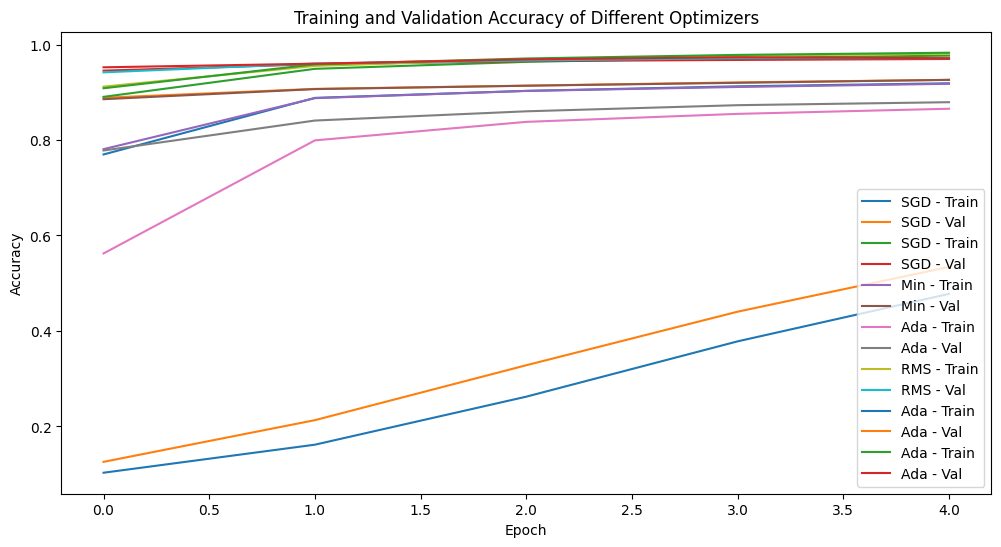

In [11]:
plt.figure(figsize=(12, 6))
for name, history in history_data.items():
    plt.plot(history.history['accuracy'], label=f'{name[:3]} - Train')
    plt.plot(history.history['val_accuracy'], label=f'{name[:3]} - Val')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Different Optimizers')
plt.legend(loc='lower right')
plt.show()

ML2 Backup codes

1) Boolean Gates using Perceptron

In [12]:
import numpy as np

def yin(t):
    return 1 if t >= 0 else 0

def perceptron(x, w, b):
    t = np.dot(w, x) + b
    return yin(t)

# AND Gate
def AND(x):
    w = np.array([1, 1])
    b = -2
    return perceptron(x, w, b)

print("AND Gate:")
print("0 AND 1 =", AND(np.array([0, 1])))
print("1 AND 1 =", AND(np.array([1, 1])))
print("0 AND 0 =", AND(np.array([0, 0])))
print("1 AND 0 =", AND(np.array([1, 0])))

# OR Gate
def OR(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

print("\nOR Gate:")
print("0 OR 1 =", OR(np.array([0, 1])))
print("1 OR 1 =", OR(np.array([1, 1])))
print("0 OR 0 =", OR(np.array([0, 0])))
print("1 OR 0 =", OR(np.array([1, 0])))

# NOT Gate
def NOT(x):
    w = np.array([-1])
    b = 0.5
    return perceptron(x, w, b)

print("\nNOT Gate:")
print("NOT 0 =", NOT(np.array([0])))
print("NOT 1 =", NOT(np.array([1])))

# NOR Gate
def NOR(x):
    w = np.array([-1, -1])
    b = 0.5
    return perceptron(x, w, b)

print("\nNOR Gate:")
print("0 NOR 1 =", NOR(np.array([0, 1])))
print("1 NOR 1 =", NOR(np.array([1, 1])))
print("0 NOR 0 =", NOR(np.array([0, 0])))
print("1 NOR 0 =", NOR(np.array([1, 0])))

# NAND Gate
def NAND(x):
    w = np.array([-1, -1])
    b = 1.5
    return perceptron(x, w, b)

print("\nNAND Gate:")
print("0 NAND 1 =", NAND(np.array([0, 1])))
print("1 NAND 1 =", NAND(np.array([1, 1])))
print("0 NAND 0 =", NAND(np.array([0, 0])))
print("1 NAND 0 =", NAND(np.array([1, 0])))

# XOR Gate
def XOR(x):
    w_nand = np.array([-1, -1])
    b_nand = 1.5
    s1 = perceptron(x, w_nand, b_nand)

    w_or = np.array([1, 1])
    b_or = -0.5
    s2 = perceptron(x, w_or, b_or)

    w_and = np.array([1, 1])
    b_and = -2
    return perceptron(np.array([s1, s2]), w_and, b_and)

print("\nXOR Gate:")
print("0 XOR 1 =", XOR(np.array([0, 1])))
print("1 XOR 1 =", XOR(np.array([1, 1])))
print("0 XOR 0 =", XOR(np.array([0, 0])))
print("1 XOR 0 =", XOR(np.array([1, 0])))

# Display weights and biases
print("\nWeights and Biases:")
print("AND -> Weights:", [1, 1], "Bias:", -2)
print("OR -> Weights:", [1, 1], "Bias:", -0.5)
print("NOT -> Weights:", [-1], "Bias:", 0.5)
print("NOR -> Weights:", [-1, -1], "Bias:", 0.5)
print("NAND -> Weights:", [-1, -1], "Bias:", 1.5)

AND Gate:
0 AND 1 = 0
1 AND 1 = 1
0 AND 0 = 0
1 AND 0 = 0

OR Gate:
0 OR 1 = 1
1 OR 1 = 1
0 OR 0 = 0
1 OR 0 = 1

NOT Gate:
NOT 0 = 1
NOT 1 = 0

NOR Gate:
0 NOR 1 = 0
1 NOR 1 = 0
0 NOR 0 = 1
1 NOR 0 = 0

NAND Gate:
0 NAND 1 = 1
1 NAND 1 = 0
0 NAND 0 = 1
1 NAND 0 = 1

XOR Gate:
0 XOR 1 = 1
1 XOR 1 = 0
0 XOR 0 = 0
1 XOR 0 = 1

Weights and Biases:
AND -> Weights: [1, 1] Bias: -2
OR -> Weights: [1, 1] Bias: -0.5
NOT -> Weights: [-1] Bias: 0.5
NOR -> Weights: [-1, -1] Bias: 0.5
NAND -> Weights: [-1, -1] Bias: 1.5


2) Backpropagation

Epoch 0, MSE: 0.3236, Accuracy: 0.0417
Epoch 100, MSE: 0.0145, Accuracy: 0.9750
Epoch 200, MSE: 0.0117, Accuracy: 0.9833
Epoch 300, MSE: 0.0109, Accuracy: 0.9833
Epoch 400, MSE: 0.0106, Accuracy: 0.9833
Epoch 500, MSE: 0.0104, Accuracy: 0.9833
Epoch 600, MSE: 0.0103, Accuracy: 0.9833
Epoch 700, MSE: 0.0102, Accuracy: 0.9833
Epoch 800, MSE: 0.0102, Accuracy: 0.9833
Epoch 900, MSE: 0.0101, Accuracy: 0.9833


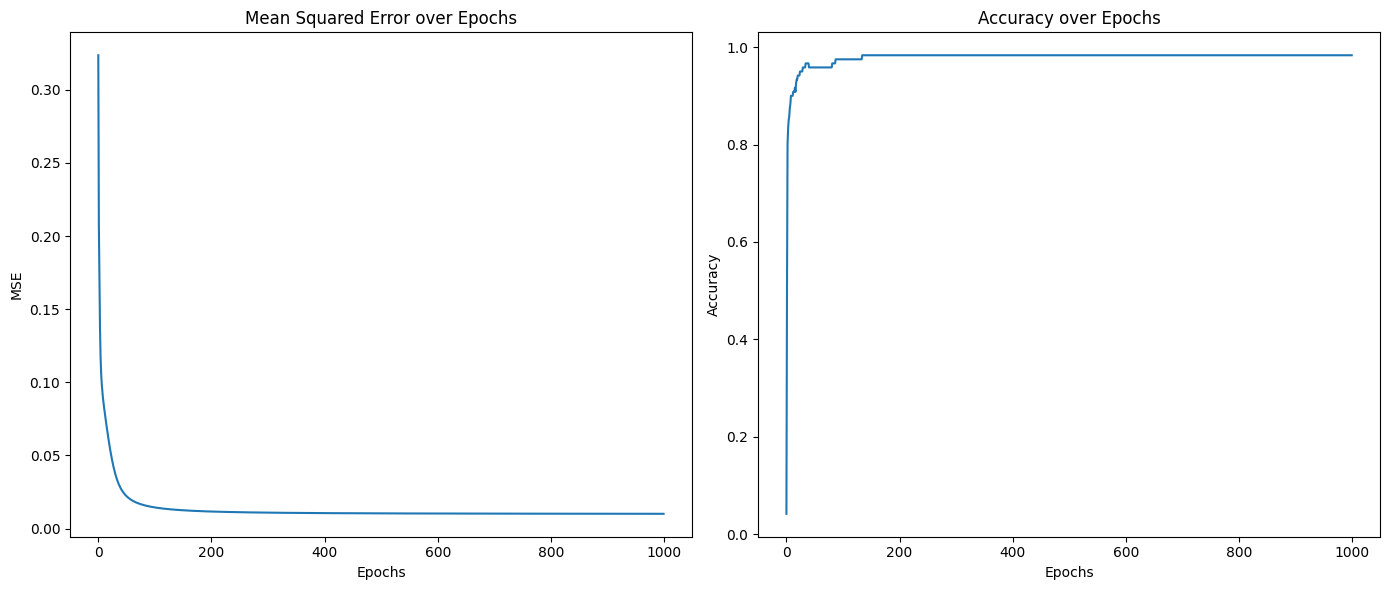

Test Accuracy: 1.0000


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Feedforward function
def feedforward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output, a1

# Backpropagation function
def backprop(X, y, output, a1):
    global W1, W2, b1, b2
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    a1_error = np.dot(output_delta, W2.T)
    a1_delta = a1_error * sigmoid_derivative(a1)

    W2 += np.dot(a1.T, output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X.T, a1_delta) * learning_rate
    b1 += np.sum(a1_delta, axis=0, keepdims=True) * learning_rate

# Training loop
mse_list = []
accuracy_list = []

for epoch in range(epochs):
    output, a1 = feedforward(X_train)
    mse = mean_squared_error(y_train, output)
    mse_list.append(mse)

    predictions = np.argmax(output, axis=1)
    accuracy = np.mean(predictions == np.argmax(y_train, axis=1))
    accuracy_list.append(accuracy)

    backprop(X_train, y_train, output, a1)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

# Plot Mean Squared Error and Accuracy
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title('Mean Squared Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Evaluate on test data
output_test, _ = feedforward(X_test)
test_predictions = np.argmax(output_test, axis=1)
test_accuracy = np.mean(test_predictions == np.argmax(y_test, axis=1))

print(f'Test Accuracy: {test_accuracy:.4f}')

3) Optimizer

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import (
    SGD, RMSprop, Adagrad, Adam, Adadelta
)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple neural network
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Optimizers to test
optimizers = {
    "SGD": SGD(),
    "SGD with Momentum": SGD(momentum=0.9),
    "Mini-Batch SGD": SGD(),
    "Adagrad": Adagrad(),
    "RMSProp": RMSprop(),
    "AdaDelta": Adadelta(),
    "Adam": Adam()
}

# Training parameters
batch_size = 128
epochs = 5

# Compare optimizers
results = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Print comparison
print("\nOptimizer Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Training with SGD...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


SGD Test Accuracy: 0.9121
Training with SGD with Momentum...
SGD with Momentum Test Accuracy: 0.9585
Training with Mini-Batch SGD...
Mini-Batch SGD Test Accuracy: 0.9081
Training with Adagrad...
Adagrad Test Accuracy: 0.8646
Training with RMSProp...
RMSProp Test Accuracy: 0.9724
Training with AdaDelta...
AdaDelta Test Accuracy: 0.4139
Training with Adam...
Adam Test Accuracy: 0.9744

Optimizer Comparison:
SGD: 0.9121
SGD with Momentum: 0.9585
Mini-Batch SGD: 0.9081
Adagrad: 0.8646
RMSProp: 0.9724
AdaDelta: 0.4139
Adam: 0.9744
